## Dataset Content

<b>Context</b>

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

<b>Attribute information</b>

- Invoice id: Computer generated sales slip invoice identification number
- Branch: Branch of supercenter (3 branches are available identified by A, B and C).
- City: Location of supercenters
- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- Gender: Gender type of customer
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in USD
- Quantity: Number of products purchased by customer
- Tax: 5% tax fee for customer buying
- Total: Total price including tax
- Date: Date of purchase (Record available from January 2019 to March 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- COGS: Cost of goods sold
- Gross margin percentage: Gross margin percentage
- Gross income: Gross income
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Idea
- How is the time/workdays or weekend impacting the customer behavior?
- Columns to keep:

       ['Product line', 'Unit price', 'Quantity', 'Total', 'Date', 'Time', 'Rating']

## First look

In [1]:
# Importing librairies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

In [2]:
# Importing file
retail_original = pd.read_csv('./dataset/supermarket_sales - Sheet1.csv')
retail_original.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
# Shape
retail_original.shape

(1000, 17)

In [4]:
# Type
retail_original.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [5]:
# Looking for nulls
retail_original.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
# Unique values
categorical_columns = retail_original.select_dtypes(include=['object'])
for col in categorical_columns:
    print(col + ':' + str(categorical_columns[col].nunique()))

Invoice ID:1000
Branch:3
City:3
Customer type:2
Gender:2
Product line:6
Date:89
Time:506
Payment:3


In [7]:
# Printing unique values for product line 
print(retail_original['Product line'].unique())

['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


## Cleaning

In [8]:
# New DF with only used columns
retail = retail_original[['Product line', 'Unit price', 'Quantity', 'Total', 'Date', 'Time', 'Rating']]
retail.head()

,Product line,Unit price,Quantity,Total,Date,Time,Rating
0,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,9.1
1,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,9.6
2,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,7.4
3,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,8.4
4,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,5.3


#### Date and Time columns

In [9]:
# Joining Date and Time
retail["Date"] = retail["Date"] + ' ' + retail["Time"]

# Dropping Time column
retail = retail.drop(['Time'], axis = 1)

# Converting Datetime object to datetime
retail['Date'] = pd.to_datetime(retail['Date'])

# Get hour
retail['Hour'] = retail['Date'].dt.hour

# Get weekday: Monday = 0 - Sunday = 6
retail['Weekday'] = retail['Date'].dt.dayofweek

/Users/marie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# Separate workdays from weedkends days
retail.Weekday = retail.Weekday.astype('object')
retail.Weekday = retail.Weekday.map({0: "Workday", 1: "Workday", 1: "Workday", 3: "Workday"
                                         , 4: "Workday", 5: "Weekend", 6: "Weekend"})

In [11]:
# Checking time serie
retail['Date'].min(), retail['Date'].max()

(Timestamp('2019-01-01 10:39:00'), Timestamp('2019-03-30 20:37:00'))

#### Looking for outliers

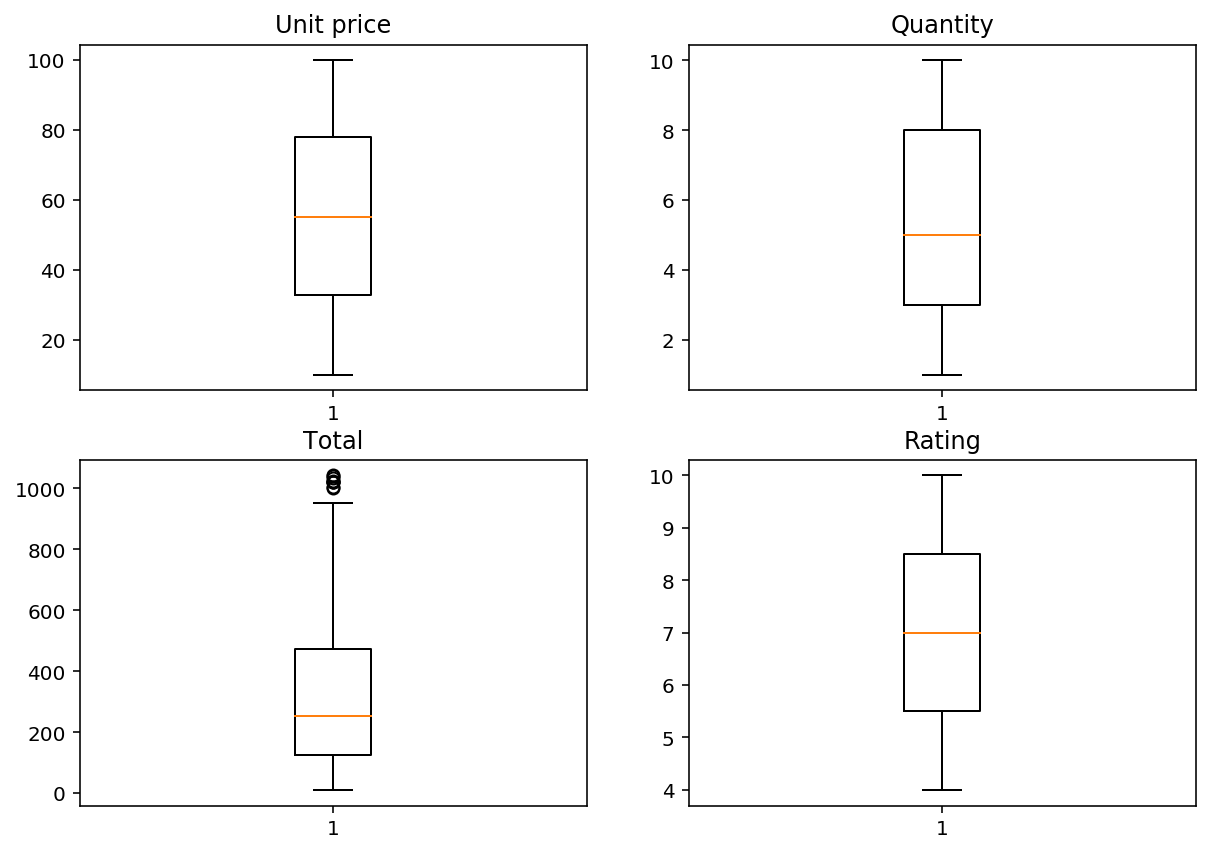

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (10,7))

axs[0, 0].boxplot(x = retail['Unit price'])
axs[0, 0].set_title('Unit price')

axs[0, 1].boxplot(x = retail['Quantity'])
axs[0, 1].set_title('Quantity')

axs[1, 0].boxplot(x = retail['Total'])
axs[1, 0].set_title('Total')

axs[1, 1].boxplot(x = retail['Rating'])
axs[1, 1].set_title('Rating')

plt.show()

##### Total column: cleaning outliers

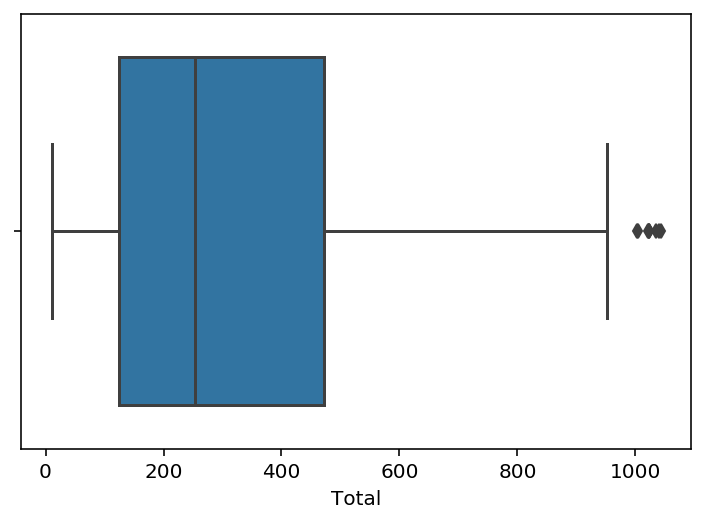

In [13]:
sns.boxplot(x = retail['Total'])
plt.show()

In [14]:
Q1 = retail['Total'].quantile(0.25)
Q3 = retail['Total'].quantile(0.75)
IQR = Q3 - Q1

retail['Total'] = retail['Total'][~((retail['Total'] < (Q1 - 1.5 * IQR)) | 
                                    (retail['Total'] > (Q3 + 1.5 * IQR)))]

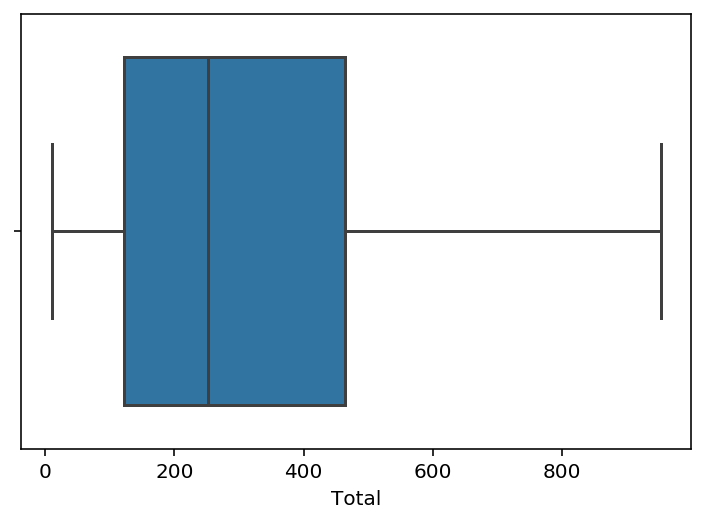

In [15]:
sns.boxplot(x = retail['Total'])
plt.show()

#### Cleaned dataset

In [16]:
# Reordering columns
retail = retail[['Date', 'Weekday', 'Hour', 'Product line', 'Quantity', 'Total', 'Rating']]

In [17]:
retail.head()

,Date,Weekday,Hour,Product line,Quantity,Total,Rating
0,2019-01-05 13:08:00,Weekend,13,Health and beauty,7,548.9715,9.1
1,2019-03-08 10:29:00,Workday,10,Electronic accessories,5,80.2200,9.6
2,2019-03-03 13:23:00,Weekend,13,Home and lifestyle,7,340.5255,7.4
3,2019-01-27 20:33:00,Weekend,20,Health and beauty,8,489.0480,8.4
4,2019-02-08 10:37:00,Workday,10,Sports and travel,7,634.3785,5.3


In [18]:
# Saving retail clean to csv
retail.to_csv('./dataset/retail_clean.csv')